In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from dynamic_drone import *
from simulations import simulation, plot_pretty

import matplotlib.pyplot as plt


In [10]:
def quick_test(kp,ki,kd, length=500, plot = True, show = None):
    if show is None:
        show = []
    
    xyz = np.array([0.0, 0.0, 0.0])
    rpy = np.array([0.0, 0.0, 0.0])
    drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                     I=(1,1,1), m=1, b=1, l=1, d=1)
    controller_xyz = PIDControler(kp, ki, kd)
    controller_rpy = PIDControler(kp, ki, kd)
    drone_controller = DroneController(drone, controller_xyz, controller_rpy)

    length = length
    xyz_target_arr = np.zeros([length, 3])
    xyz_target_arr[:,2] = 10
    psi_target_arr = np.zeros(length)

    res = simulation(drone_controller, xyz_target_arr, psi_target_arr, show=[])
    if plot:
        plot_pretty(res)
    return res

In [11]:
def batch_test(k_list):
    for kp,ki,kd in k_list:
        res = quick_test(kp,ki,kd, plot=False)
        yield res['xyz_arr']

In [15]:
kp_list = [2**i for i in range(6)]
k_list = [(kp, 0.01, 0.0001) for kp in kp_list]
xyz_arr_list = list(batch_test(k_list))
xyz_arr_arr = np.array(xyz_arr_list)
xyz_arr_arr.shape

(6, 500, 3)

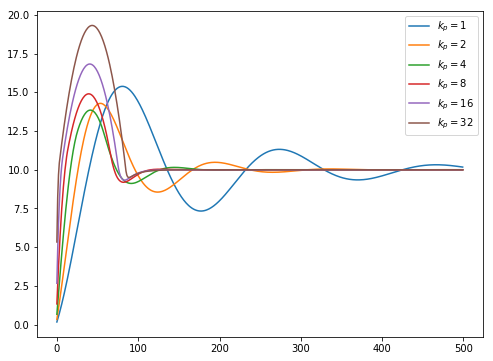

In [25]:
plt.figure(figsize=(8,6))
for i,kp in enumerate(kp_list):
    plt.plot(xyz_arr_arr[i,:,2], label=f'$k_p={kp}$')
plt.legend(loc='upper right')
plt.show()
    

In [27]:
kd_list = np.linspace(0.0,2.0,6)
k_list = [(10.0, 0.01, kd) for kd in kd_list]
xyz_arr_list = list(batch_test(k_list))
xyz_arr_arr = np.array(xyz_arr_list)
xyz_arr_arr.shape

(6, 500, 3)

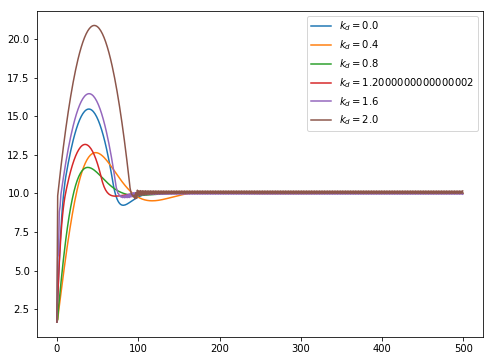

In [28]:
plt.figure(figsize=(8,6))
for i,kd in enumerate(kd_list):
    plt.plot(xyz_arr_arr[i,:,2], label=f'$k_d={kd}$')
plt.legend(loc='upper right')
plt.show()


In [29]:
ki_list = np.linspace(0.0,1.0,6)
k_list = [(10.0, ki, 1.0) for ki in ki_list]
xyz_arr_list = list(batch_test(k_list))
xyz_arr_arr = np.array(xyz_arr_list)
xyz_arr_arr.shape


(6, 500, 3)

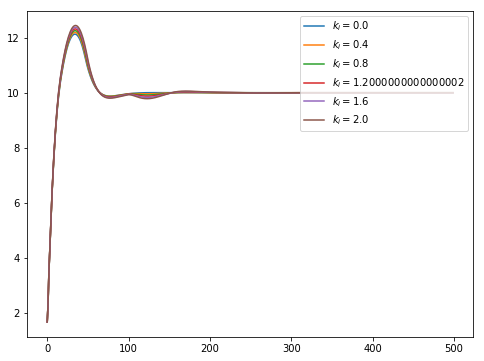

In [30]:
plt.figure(figsize=(8,6))
for i,ki in enumerate(kd_list):
    plt.plot(xyz_arr_arr[i,:,2], label=f'$k_i={ki}$')
plt.legend(loc='upper right')
plt.show()
